# **ANÁLISE DE DADOS - SUPERSTORE**

**PROJETO:** Análise completa de desempenho de vendas e lucratividade

**PERÍODO:** 2014-2017 (4 anos de dados históricos)

**DATASET:** 9.994 transações, 19 variáveis, 793 clientes únicos

**OBJETIVO:** Identificar oportunidades de melhoria e insights estratégicos

# **FASE 1: PREPARAÇÃO E ENTENDIMENTO DOS DADOS**

 1: Importação de Bibliotecas

In [6]:
# Bibliotecas básicas
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas com sucesso!")
print("📊 Versão do pandas:", pd.__version__)

✅ Bibliotecas importadas com sucesso!
📊 Versão do pandas: 2.2.2


Carregamento dos Dados

In [7]:
# Carregar o dataset
df = pd.read_csv('/content/Sample_Superstore.csv')

# Verificar se carregou corretamente
print("✅ Dataset carregado com sucesso!")
print(f"📈 Dimensões do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas")

# Nome das colunas
print("\n📋 Colunas disponíveis:")
print(df.columns.tolist())

✅ Dataset carregado com sucesso!
📈 Dimensões do dataset: 9994 linhas e 19 colunas

📋 Colunas disponíveis:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


Primeira Inspeção dos Dados

In [8]:
# Primeiras 5 linhas do dataset
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\n" + "="*50)
print("Ultimas 5 linhas do dataset:")
print(df.tail())

Primeiras 5 linhas do dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Segment        Country             City       State Region  \
0   Consumer  United States        Henderson    Kentucky  South   
1   Consumer  United States        Henderson    Kentucky  South   
2  Corporate  United States      Los Angeles  California   West   
3   Consumer  United States  Fort Lauderdale     Florida  South   
4   Consumer  United States  Fort Lauderdale     Florida  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        F

Informações Gerais e Tipos de Dados

In [9]:
# Informações sobre tipos de dados e valores nulos
print("INFORMACOES GERAIS DO DATASET:")
print(df.info())

print("\n" + "="*50)
print("TIPOS DE DADOS:")
print(df.dtypes)

INFORMACOES GERAIS DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 1

Estatísticas Descritivas

In [10]:
# Estatísticas descritivas das colunas numéricas
print("ESTATISTICAS DESCRITIVAS - COLUNAS NUMERICAS:")
print(df.describe())

print("\n" + "="*50)
print("ESTATISTICAS DESCRITIVAS - COLUNAS CATEGORICAS:")
print(df.describe(include=['object']))

ESTATISTICAS DESCRITIVAS - COLUNAS NUMERICAS:
            Row ID         Sales     Quantity     Discount       Profit
count  9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   4997.500000    229.858001     3.789574     0.156203    28.656896
std    2885.163629    623.245101     2.225110     0.206452   234.260108
min       1.000000      0.444000     1.000000     0.000000 -6599.978000
25%    2499.250000     17.280000     2.000000     0.000000     1.728750
50%    4997.500000     54.490000     3.000000     0.200000     8.666500
75%    7495.750000    209.940000     5.000000     0.200000    29.364000
max    9994.000000  22638.480000    14.000000     0.800000  8399.976000

ESTATISTICAS DESCRITIVAS - COLUNAS CATEGORICAS:
              Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
count             9994        9994        9994            9994        9994   
unique            5009        1237        1334               4         793   
top     CA-2017-100111 

Verificação de Qualidade dos Dados

In [11]:
# Verificar valores nulos
print("VERIFICACAO DE VALORES NULOS:")
print(df.isnull().sum())

print("\n" + "="*50)
print("VERIFICACAO DE LINHAS DUPLICADAS:")
duplicados = df.duplicated().sum()
print(f"Linhas duplicadas: {duplicados}")

print("\n" + "="*50)
print("VALORES UNICOS EM COLUNAS CATEGORICAS:")
categorical_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print(f"Quantidade: {df[col].nunique()}")
    print("-" * 30)

VERIFICACAO DE VALORES NULOS:
Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

VERIFICACAO DE LINHAS DUPLICADAS:
Linhas duplicadas: 0

VALORES UNICOS EM COLUNAS CATEGORICAS:
Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Quantidade: 4
------------------------------
Segment: ['Consumer' 'Corporate' 'Home Office']
Quantidade: 3
------------------------------
Region: ['South' 'West' 'Central' 'East']
Quantidade: 4
------------------------------
Category: ['Furniture' 'Office Supplies' 'Technology']
Quantidade: 3
------------------------------
Sub-Category: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper'

Preparação das Datas

In [12]:
# Converter colunas de data para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')

# Verificar se a conversão foi bem sucedida
print("TIPOS DE DADOS APOS CONVERSAO:")
print(f"Order Date: {df['Order Date'].dtype}")
print(f"Ship Date: {df['Ship Date'].dtype}")

print("\n" + "="*50)
print("PERIODO DO DATASET:")
print(f"Data do pedido mais antigo: {df['Order Date'].min()}")
print(f"Data do pedido mais recente: {df['Order Date'].max()}")
print(f"Range temporal: {(df['Order Date'].max() - df['Order Date'].min()).days} dias")

print("\n" + "="*50)
print("TEMPO MEDIO DE ENVIO:")
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
print(f"Tempo medio de envio: {df['Shipping Time'].mean():.1f} dias")

TIPOS DE DADOS APOS CONVERSAO:
Order Date: datetime64[ns]
Ship Date: datetime64[ns]

PERIODO DO DATASET:
Data do pedido mais antigo: 2014-01-03 00:00:00
Data do pedido mais recente: 2017-12-30 00:00:00
Range temporal: 1457 dias

TEMPO MEDIO DE ENVIO:
Tempo medio de envio: 4.0 dias


# **FASE 2: ANÁLISE EXPLORATÓRIA**

Análise de Vendas por Categoria

In [14]:
# Análise de vendas por categoria
print("ANALISE DE VENDAS POR CATEGORIA:")
vendas_categoria = df.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': 'sum',
    'Quantity': 'sum'
}).round(2)

vendas_categoria.columns = ['Total Vendas', 'Venda Media', 'Qtd Pedidos', 'Total Lucro', 'Total Quantidade']
print(vendas_categoria)

print("\n" + "="*50)
print("DISTRIBUICAO DE PEDIDOS POR CATEGORIA:")
distribuicao = df['Category'].value_counts()
print(distribuicao)

ANALISE DE VENDAS POR CATEGORIA:
                 Total Vendas  Venda Media  Qtd Pedidos  Total Lucro  \
Category                                                               
Furniture           741999.80       349.83         2121     18451.27   
Office Supplies     719047.03       119.32         6026    122490.80   
Technology          836154.03       452.71         1847    145454.95   

                 Total Quantidade  
Category                           
Furniture                    8028  
Office Supplies             22906  
Technology                   6939  

DISTRIBUICAO DE PEDIDOS POR CATEGORIA:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


Análise de Vendas por Subcategoria

In [15]:
# Análise detalhada por subcategoria
print("TOP 10 SUBCATEGORIAS POR VENDAS:")
vendas_subcategoria = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Order ID': 'count'
}).round(2)

vendas_subcategoria = vendas_subcategoria.rename(columns={'Order ID': 'Qtd Pedidos'})
vendas_subcategoria = vendas_subcategoria.sort_values('Sales', ascending=False)
print(vendas_subcategoria.head(10))

print("\n" + "="*50)
print("SUBCATEGORIAS COM LUCRO NEGATIVO:")
lucro_negativo = vendas_subcategoria[vendas_subcategoria['Profit'] < 0]
print(lucro_negativo)

TOP 10 SUBCATEGORIAS POR VENDAS:
                  Sales    Profit  Quantity  Qtd Pedidos
Sub-Category                                            
Phones        330007.05  44515.73      3289          889
Chairs        328449.10  26590.17      2356          617
Storage       223843.61  21278.83      3158          846
Tables        206965.53 -17725.48      1241          319
Binders       203412.73  30221.76      5974         1523
Machines      189238.63   3384.76       440          115
Accessories   167380.32  41936.64      2976          775
Copiers       149528.03  55617.82       234           68
Bookcases     114880.00  -3472.56       868          228
Appliances    107532.16  18138.01      1729          466

SUBCATEGORIAS COM LUCRO NEGATIVO:
                  Sales    Profit  Quantity  Qtd Pedidos
Sub-Category                                            
Tables        206965.53 -17725.48      1241          319
Bookcases     114880.00  -3472.56       868          228
Supplies       46673

Análise por Região e Estado

In [16]:
# Análise por região
print("DESEMPENHO POR REGIAO:")
performance_regiao = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

performance_regiao = performance_regiao.rename(columns={'Order ID': 'Qtd Pedidos'})
performance_regiao['Margem Lucro'] = (performance_regiao['Profit'] / performance_regiao['Sales'] * 100).round(2)
print(performance_regiao)

print("\n" + "="*50)
print("TOP 10 ESTADOS POR LUCRO:")
lucro_estado = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
print(lucro_estado)

print("\n" + "="*50)
print("TOP 10 ESTADOS COM PREJUIZO:")
prejuizo_estado = df.groupby('State')['Profit'].sum().sort_values().head(10)
print(prejuizo_estado)

DESEMPENHO POR REGIAO:
             Sales     Profit  Qtd Pedidos  Margem Lucro
Region                                                  
Central  501239.89   39706.36         2323          7.92
East     678781.24   91522.78         2848         13.48
South    391721.90   46749.43         1620         11.93
West     725457.82  108418.45         3203         14.94

TOP 10 ESTADOS POR LUCRO:
State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

TOP 10 ESTADOS COM PREJUIZO:
State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.47

Análise por Segmento de Cliente

In [17]:
# Análise por segmento de cliente
print("DESEMPENHO POR SEGMENTO DE CLIENTE:")
performance_segmento = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Customer ID': 'nunique'
}).round(2)

performance_segmento = performance_segmento.rename(columns={
    'Order ID': 'Qtd Pedidos',
    'Customer ID': 'Qtd Clientes Unicos'
})

performance_segmento['Ticket Medio'] = (performance_segmento['Sales'] / performance_segmento['Qtd Pedidos']).round(2)
performance_segmento['Lucro por Pedido'] = (performance_segmento['Profit'] / performance_segmento['Qtd Pedidos']).round(2)

print(performance_segmento)

print("\n" + "="*50)
print("TOP 10 CLIENTES MAIS VALIOSOS:")
clientes_valiosos = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

clientes_valiosos = clientes_valiosos.rename(columns={'Order ID': 'Qtd Pedidos'})
clientes_valiosos = clientes_valiosos.sort_values('Profit', ascending=False).head(10)
print(clientes_valiosos)

DESEMPENHO POR SEGMENTO DE CLIENTE:
                  Sales     Profit  Qtd Pedidos  Qtd Clientes Unicos  \
Segment                                                                
Consumer     1161401.34  134119.21         5191                  409   
Corporate     706146.37   91979.13         3020                  236   
Home Office   429653.15   60298.68         1783                  148   

             Ticket Medio  Lucro por Pedido  
Segment                                      
Consumer           223.73             25.84  
Corporate          233.82             30.46  
Home Office        240.97             33.82  

TOP 10 CLIENTES MAIS VALIOSOS:
                Sales   Profit  Qtd Pedidos
Customer ID                                
TC-20980     19052.22  8981.32           12
RB-19360     15117.34  6976.10           18
SC-20095     14142.33  5757.41           22
HL-15040     12873.30  5622.43           11
AB-10105     14473.57  5444.81           20
TA-21385     14595.62  4703.79   

# **FASE 3: ANÁLISE DE PERFORMANCE**

Análise de Descontos vs Lucro

In [18]:
# Análise do impacto dos descontos no lucro
print("IMPACTO DOS DESCONTOS NO LUCRO:")
df['Discount Range'] = pd.cut(df['Discount'],
                           bins=[0, 0.1, 0.3, 0.5, 1],
                           labels=['0-10%', '10-30%', '30-50%', '50-100%'])

impacto_desconto = df.groupby('Discount Range').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Discount': 'mean'
}).round(2)

impacto_desconto = impacto_desconto.rename(columns={'Order ID': 'Qtd Pedidos'})
impacto_desconto['Margem Lucro'] = (impacto_desconto['Profit'] / impacto_desconto['Sales'] * 100).round(2)
print(impacto_desconto)

print("\n" + "="*50)
print("CORRELACAO ENTRE VARIAVEIS NUMERICAS:")
correlacao = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(correlacao.round(3))

IMPACTO DOS DESCONTOS NO LUCRO:
                    Sales    Profit  Qtd Pedidos  Discount  Margem Lucro
Discount Range                                                          
0-10%            54369.35   9029.18           94      0.10         16.61
10-30%          895379.54  81387.02         3936      0.21          9.09
30-50%          195314.76 -48447.73          310      0.42        -24.80
50-100%          64228.74 -76559.05          856      0.72       -119.20

CORRELACAO ENTRE VARIAVEIS NUMERICAS:
          Sales  Quantity  Discount  Profit
Sales     1.000     0.201    -0.028   0.479
Quantity  0.201     1.000     0.009   0.066
Discount -0.028     0.009     1.000  -0.219
Profit    0.479     0.066    -0.219   1.000


Análise de Sazonalidade

In [19]:
# Extrair ano e mês para análise temporal
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order YearMonth'] = df['Order Date'].dt.to_period('M')

# Análise de vendas por ano
print("VENDAS E LUCRO POR ANO:")
vendas_ano = df.groupby('Order Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

vendas_ano = vendas_ano.rename(columns={'Order ID': 'Qtd Pedidos'})
vendas_ano['Crescimento Vendas'] = vendas_ano['Sales'].pct_change() * 100
vendas_ano['Margem Lucro'] = (vendas_ano['Profit'] / vendas_ano['Sales'] * 100).round(2)
print(vendas_ano)

print("\n" + "="*50)
print("VENDAS POR MES (MEDIA):")
vendas_mes = df.groupby('Order Month').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Order ID': 'count'
}).round(2)

vendas_mes = vendas_mes.rename(columns={'Order ID': 'Qtd Pedidos'})
print(vendas_mes)

VENDAS E LUCRO POR ANO:
                Sales    Profit  Qtd Pedidos  Crescimento Vendas  Margem Lucro
Order Year                                                                    
2014        484247.50  49543.97         1993                 NaN         10.23
2015        470532.51  61618.60         2102           -2.832227         13.10
2016        609205.60  81795.17         2587           29.471522         13.43
2017        733215.26  93439.27         3312           20.355962         12.74

VENDAS POR MES (MEDIA):
              Sales  Profit  Qtd Pedidos
Order Month                             
1            249.15   23.97          381
2            199.17   34.32          300
3            294.55   41.08          696
4            206.23   17.35          668
5            210.92   30.49          735
6            213.00   29.69          717
7            207.38   19.48          710
8            225.27   30.85          706
9            222.45   26.65         1383
10           244.59   38.8

# **FASE 4: VISUALIZAÇÕES E INSIGHTS**

Vendas e Lucro por Categoria

<Figure size 1000x600 with 0 Axes>

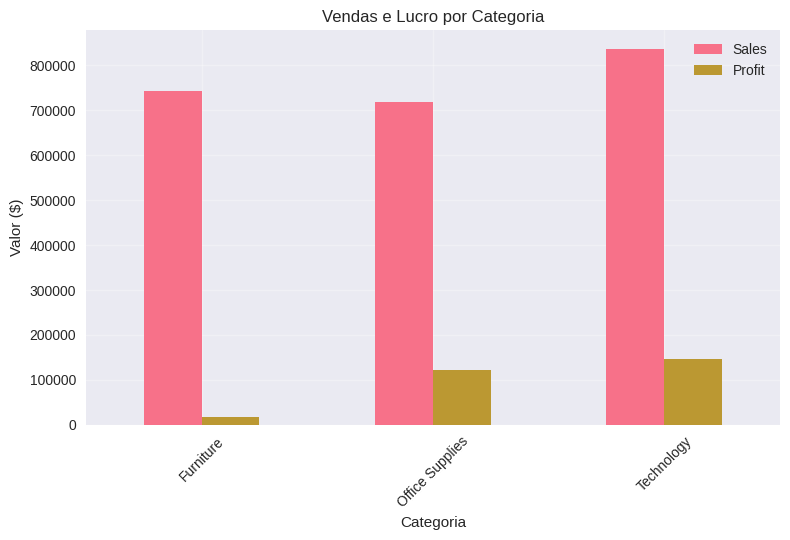

In [20]:
# Gráfico 1: Vendas e Lucro por Categoria
plt.figure(figsize=(10, 6))
categoria_data = df.groupby('Category')[['Sales', 'Profit']].sum()
categoria_data.plot(kind='bar')
plt.title('Vendas e Lucro por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Top 10 Subcategorias por Lucro

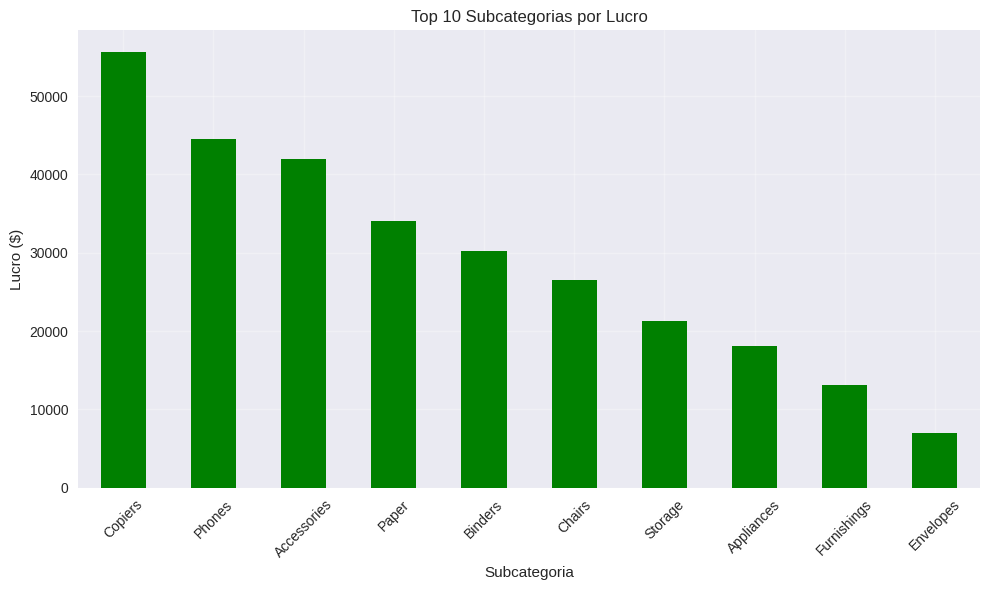

In [21]:
# Gráfico 2: Lucro por Subcategoria (Top 10)
plt.figure(figsize=(10, 6))
lucro_sub = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
lucro_sub.plot(kind='bar', color=['green' if x > 0 else 'red' for x in lucro_sub])
plt.title('Top 10 Subcategorias por Lucro')
plt.xlabel('Subcategoria')
plt.ylabel('Lucro ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Impacto dos Descontos no Lucro

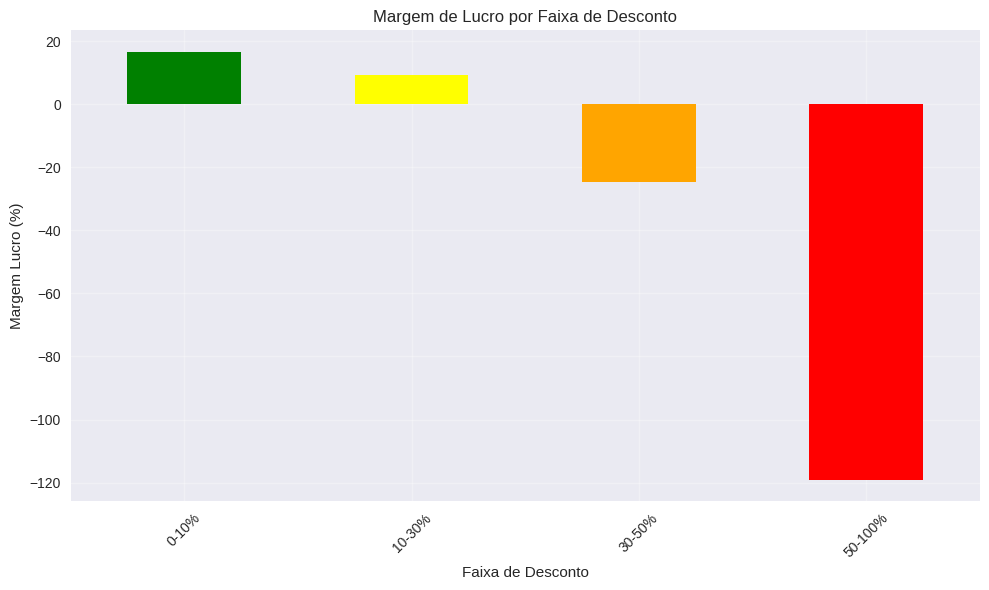

In [22]:
# Gráfico 3: Impacto dos Descontos no Lucro
plt.figure(figsize=(10, 6))
impacto_desconto['Margem Lucro'].plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Margem de Lucro por Faixa de Desconto')
plt.xlabel('Faixa de Desconto')
plt.ylabel('Margem Lucro (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Vendas por Mês

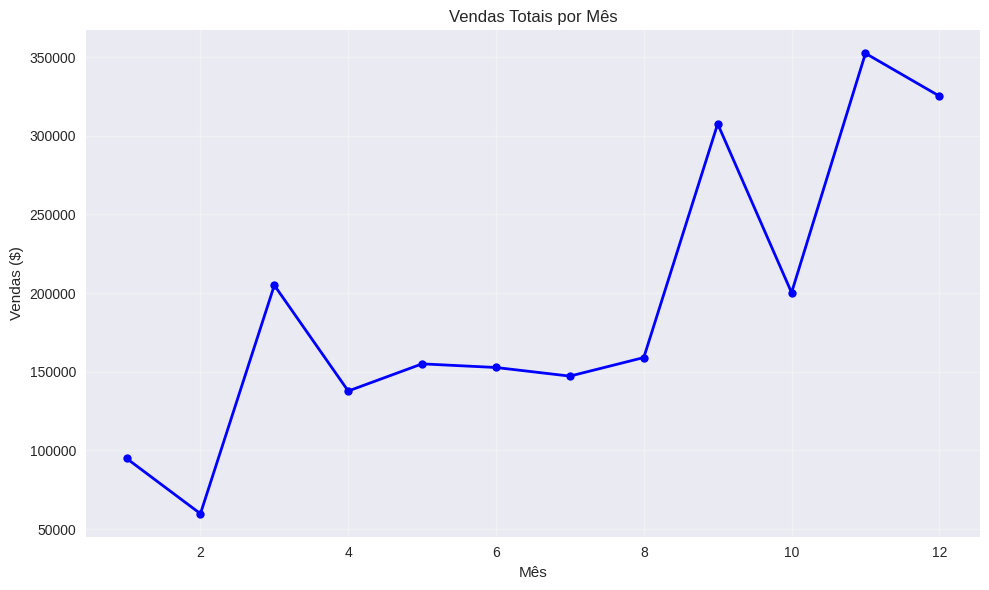

In [23]:
# Gráfico 4: Vendas por Mês
plt.figure(figsize=(10, 6))
vendas_mes_plot = df.groupby('Order Month')['Sales'].sum()
vendas_mes_plot.plot(kind='line', marker='o', color='blue', linewidth=2, markersize=6)
plt.title('Vendas Totais por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Mapa de Calor de Correlações

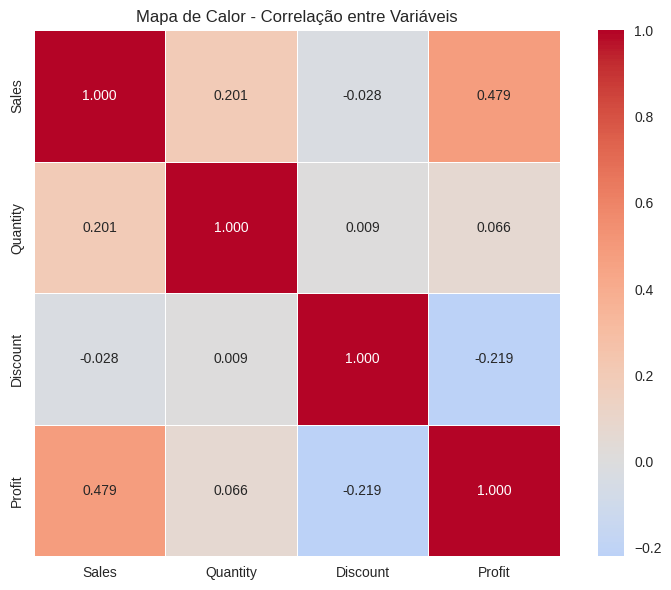

In [24]:
# Mapa de calor das correlações
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.tight_layout()
plt.show()

Resumo Executivo e Insights

In [26]:
print("=" * 70)
print("RELATORIO FINAL - PRINCIPAIS INSIGHTS")
print("=" * 70)

print("\nMETRICAS GERAIS:")
print(f"- Total de Vendas: ${df['Sales'].sum():,.2f}")
print(f"- Total de Lucro: ${df['Profit'].sum():,.2f}")
print(f"- Margem de Lucro Geral: {(df['Profit'].sum()/df['Sales'].sum()*100):.2f}%")
print(f"- Total de Pedidos: {df['Order ID'].nunique()}")
print(f"- Total de Clientes: {df['Customer ID'].nunique()}")

print("\nPROBLEMAS IDENTIFICADOS:")
print("1. Subcategorias com PREJUIZO:")
for subcat in lucro_negativo.index:
    lucro = lucro_negativo.loc[subcat, 'Profit']
    print(f"   - {subcat}: ${lucro:,.2f}")

print("\n2. Estados com PREJUIZO:")
for state in prejuizo_estado.index[:3]:
    prejuizo = prejuizo_estado[state]
    print(f"   - {state}: ${prejuizo:,.2f}")

print("\n3. Impacto NEGATIVO de Descontos:")
print(f"   - Descontos > 30%: Margem de {impacto_desconto.loc['30-50%', 'Margem Lucro']}%")
print(f"   - Descontos > 50%: Margem de {impacto_desconto.loc['50-100%', 'Margem Lucro']}%")

print("\nOPORTUNIDADES:")
print("1. Segmentos Lucrativos:")
print(f"   - Home Office: Lucro por pedido ${performance_segmento.loc['Home Office', 'Lucro por Pedido']}")
print(f"   - Technology: Margem de {(vendas_categoria.loc['Technology', 'Total Lucro']/vendas_categoria.loc['Technology', 'Total Vendas']*100):.2f}%")

print("\n2. Produtos Estrela:")
top_produtos = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(3)
for produto in top_produtos.index:
    print(f"   - {produto}: ${top_produtos[produto]:,.2f}")

print("\n3. Regioes de Alto Desempenho:")
print(f"   - Oeste: Margem de {performance_regiao.loc['West', 'Margem Lucro']}%")
print(f"   - Leste: Margem de {performance_regiao.loc['East', 'Margem Lucro']}%")

print("\nRECOMENDACOES ESTRATEGICAS:")
print("1. REVISAR POLITICA DE DESCONTOS - Limitar descontos acima de 30%")
print("2. OTIMIZAR MIX DE PRODUTOS - Reduzir Tables e Bookcases com prejuizo")
print("3. FOCO EM CLIENTES HOME OFFICE - Maior ticket medio e lucratividade")
print("4. EXPANSAO REGIONAL - Investir mais nas regioes Oeste e Leste")
print("5. GESTAO POR ESTADO - Atencao especial para Texas, Ohio e Pennsylvania")

RELATORIO FINAL - PRINCIPAIS INSIGHTS

METRICAS GERAIS:
- Total de Vendas: $2,297,200.86
- Total de Lucro: $286,397.02
- Margem de Lucro Geral: 12.47%
- Total de Pedidos: 5009
- Total de Clientes: 793

PROBLEMAS IDENTIFICADOS:
1. Subcategorias com PREJUIZO:
   - Tables: $-17,725.48
   - Bookcases: $-3,472.56
   - Supplies: $-1,189.10

2. Estados com PREJUIZO:
   - Texas: $-25,729.36
   - Ohio: $-16,971.38
   - Pennsylvania: $-15,559.96

3. Impacto NEGATIVO de Descontos:
   - Descontos > 30%: Margem de -24.8%
   - Descontos > 50%: Margem de -119.2%

OPORTUNIDADES:
1. Segmentos Lucrativos:
   - Home Office: Lucro por pedido $33.82
   - Technology: Margem de 17.40%

2. Produtos Estrela:
   - Copiers: $55,617.82
   - Phones: $44,515.73
   - Accessories: $41,936.64

3. Regioes de Alto Desempenho:
   - Oeste: Margem de 14.94%
   - Leste: Margem de 13.48%

RECOMENDACOES ESTRATEGICAS:
1. REVISAR POLITICA DE DESCONTOS - Limitar descontos acima de 30%
2. OTIMIZAR MIX DE PRODUTOS - Reduzir Tables

# **Conclusão do Projeto**

In [27]:
print("=" * 70)
print("PROJETO CONCLUIDO COM SUCESSO")
print("=" * 70)

print("\nRESUMO DA ANALISE REALIZADA:")
print("FASE 1: Preparacao e Entendimento dos Dados")
print("- Carregamento e inspecao do dataset (9994 linhas, 19 colunas)")
print("- Verificacao de qualidade (sem nulos, sem duplicados)")
print("- Preparacao de datas e tipos de dados")

print("\nFASE 2: Analise Exploratoria (EDA)")
print("- Analise de vendas e lucro por categoria e subcategoria")
print("- Analise geografica (regioes e estados)")
print("- Analise de segmentos de clientes")
print("- Identificacao de produtos problematicos e lucrativos")

print("\nFASE 3: Analise de Performance")
print("- Impacto dos descontos na lucratividade")
print("- Analise de correlacoes entre variaveis")
print("- Analise de sazonalidade e tendencias temporais")

print("\nFASE 4: Visualizacoes e Insights")
print("- 4 graficos principais para compreensao visual")
print("- Mapa de calor de correlacoes")
print("- Relatorio executivo com insights e recomendacoes")

print("\nPRINCIPAIS ACHADOS:")
print(f"- Margem de lucro geral: 12.47%")
print(f"- 3 subcategorias com prejuizo acumulado: $22,387.14")
print(f"- 3 estados com prejuizo acumulado: $58,260.70")
print(f"- Descontos acima de 30% geram prejuizo de 24.8% a 119.2%")

print("\nPROXIMOS PASSOS POTENCIAIS:")
print("- Analise de custos por produto")
print("- Segmentacao de clientes por valor")
print("- Analise de campanhas de marketing")
print("- Previsao de demanda e vendas")

PROJETO CONCLUIDO COM SUCESSO

RESUMO DA ANALISE REALIZADA:
FASE 1: Preparacao e Entendimento dos Dados
- Carregamento e inspecao do dataset (9994 linhas, 19 colunas)
- Verificacao de qualidade (sem nulos, sem duplicados)
- Preparacao de datas e tipos de dados

FASE 2: Analise Exploratoria (EDA)
- Analise de vendas e lucro por categoria e subcategoria
- Analise geografica (regioes e estados)
- Analise de segmentos de clientes
- Identificacao de produtos problematicos e lucrativos

FASE 3: Analise de Performance
- Impacto dos descontos na lucratividade
- Analise de correlacoes entre variaveis
- Analise de sazonalidade e tendencias temporais

FASE 4: Visualizacoes e Insights
- 4 graficos principais para compreensao visual
- Mapa de calor de correlacoes
- Relatorio executivo com insights e recomendacoes

PRINCIPAIS ACHADOS:
- Margem de lucro geral: 12.47%
- 3 subcategorias com prejuizo acumulado: $22,387.14
- 3 estados com prejuizo acumulado: $58,260.70
- Descontos acima de 30% geram prej